# Data Explore

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns

## Cleaned Data Import

In [2]:
df_track = pd.read_csv('data/track.csv')
df_album = pd.read_csv('data/album.csv')
df_artist = pd.read_csv('data/artist.csv')
df_rating = pd.read_csv('data/rating.csv')
df_similar = pd.read_csv('data/track_similarity.csv')

## Defining Useful functions

In [3]:
# ======================= Convert Names to IDs =============================

def convert_artist_name_to_id(df_artist, artist_name):
    return df_artist[df_artist['name'] == artist_name]['artist_id'].values[0]

def convert_album_name_to_id(album_name):
    return df_album[df_album['name'] == album_name]['album_id'].values[0]

def convert_track_name_to_id(track_name):
    return df_track[df_track['name'] == track_name]['track_id'].values[0]

# ======================= Convert Ids to Names =============================

def convert_track_id_to_name(track_id):
    return df_track[df_track['track_id'] == track_id]['name'].values[0]

def convert_album_id_to_name(album_id):
    return df_album[df_album['album_id'] == album_id]['name'].values[0]

def convert_artist_id_to_name(artist_id):
    return df_artist[df_artist['artist_id'] == artist_id]['name'].values[0]

# ======================= Others =============================

def get_all_artist_albums(artist_name, byName=False):
    all_albums = df_artist[df_artist['name'] == artist_name]['all_albums'].values[0]
    all_albums = all_albums[1:-1].split(',')
    all_albums = [int(album) for album in all_albums]

    if byName:
        all_albums = [convert_album_id_to_name(album) for album in all_albums]

    return all_albums

def get_all_artist_tracks(artist_name, byName=False):
    all_tracks = df_artist[df_artist['name'] == artist_name]['all_tracks'].values[0]
    all_tracks = all_tracks[1:-1].split(',')
    all_tracks = [int(track) for track in all_tracks]

    all_tracks = [convert_track_id_to_name(track) for track in all_tracks]

    return all_tracks

## Exploration

In [4]:
# number of different artists
artist_count = len(df_artist)
print("Number of different artists:", artist_count) 

# number of different albums
album_count = len(df_album)
print("Number of different albums:", album_count)

# number of different tracks
track_count = len(df_track)
print("Number of different tracks:", track_count)

# mean number of tracks per album
mean_tracks_per_album = round(track_count / album_count, 1)
print("\nMean number of tracks per album:", mean_tracks_per_album)

# mean number of albums per artist
mean_albums_per_artist = round(album_count / artist_count, 1)   
print("Mean number of albums per artist:", mean_albums_per_artist)

# mean number of tracks per artist
mean_tracks_per_artist = round(track_count / artist_count, 1)
print("Mean number of tracks per artist:", mean_tracks_per_artist)

Number of different artists: 2557
Number of different albums: 1843
Number of different tracks: 23385

Mean number of tracks per album: 12.7
Mean number of albums per artist: 0.7
Mean number of tracks per artist: 9.1


### Artists

In [5]:
# Filter rows containing 'bieber', handling NaN values
bieber_artists = df_artist[df_artist['name'].str.contains('bieber', na=False, case=False)]

# Display the results
print('Artists containing "Bieber":\n', bieber_artists)
print('Number of artists containing "Bieber":', len(bieber_artists))

Artists containing "Bieber":
       artist_id                                          name  \
330         331     Justin Bieber Featuring Chance The Rapper   
342         343                                 Justin Bieber   
357         358  Maejor Ali Featuring Juicy J & Justin Bieber   
378         379              Justin Bieber Featuring R. Kelly   
400         401                          Tyga & Justin Bieber   
479         480             will.i.am Featuring Justin Bieber   
522         523              Justin Bieber Featuring Ludacris   
539         540           Justin Bieber Featuring Nicki Minaj   
581         582              Justin Bieber Featuring Big Sean   
628         629      Carly Rae Jepsen Featuring Justin Bieber   
673         674                 Justin Bieber Featuring Drake   
732         733     Far*East Movement Featuring Justin Bieber   
772         773          Justin Bieber Featuring Busta Rhymes   
796         797          Justin Bieber Duet With Mariah Care

In [6]:
# how many of the artist have either "&" or "and" or "featuring" in their name

# Filter rows containing '&', 'and' or 'featuring', handling NaN values
and_artists = df_artist[df_artist['name'].str.contains('&|featuring', na=False)]

# Display the results

print('Artists containing "&", "and" or "featuring":\n', and_artists)
print('Number of artists containing "&", "and" or "featuring":', len(and_artists))

# number of different track_ids in the track_similarity table because there are duplicates

# Get the number of unique track_ids in the track_similarity table
unique_track_ids = df_similar[['track_id_1', 'track_id_2']].stack().unique()
print('Number of unique track_ids in the track_similarity table:', len(unique_track_ids))

Artists containing "&", "and" or "featuring":
       artist_id                                               name  \
7             8                         Ariana Grande & The Weeknd   
13           14  Nicki Minaj Featuring Drake, Lil Wayne & Chris...   
21           22              Jessie J, Ariana Grande & Nicki Minaj   
29           30                                    Pitbull & Ne-Yo   
34           35                                 Chris Brown & Tyga   
...         ...                                                ...   
2357       2358                              Marina & the Diamonds   
2366       2367                          David Byrne & St. Vincent   
2375       2376                            Macklemore & Ryan Lewis   
2458       2459                                  RÃ¶yksopp & Robyn   
2521       2522                             Lilly Wood & The Prick   

                                             all_tracks all_albums  
7                                          

### Tracks & Albums

In [7]:
# get all tracks of an artist
artist_name = 'Taylor Swift'

# get all albums of an artist
all_albums = get_all_artist_albums(artist_name, byName=True)
all_tracks = get_all_artist_tracks(artist_name, byName=True)

print(f"\nAlbums by {artist_name}:")
for album in all_albums:
    print(album)

print(f"\n====================\nTracks by {artist_name}:")
for track in all_tracks:
    print(track)


Albums by Taylor Swift:
1989
Shake It Off
We Are Never Ever Getting Back Together
Red Karaoke
Ronan
The Hunger Games: Songs from District 12 and Beyond
Today Was a Fairytale
Taylor Swift
iTunes Live from SoHo

Tracks by Taylor Swift:
Blank Space
Shake It Off
Style
Bad Blood
Welcome To New York
Wildest Dreams
Out Of The Woods
Red
Sweeter Than Fiction
22
I Knew You Were Trouble.
Begin Again
We Are Never Ever Getting Back Together
The Moment I Knew
I Almost Do
All Too Well
Stay Stay Stay
State Of Grace
Ronan
Eyes Open
Ours
Sparks Fly
If This Was A Movie
Superman
Haunted
Mean
The Story Of Us
Back To December
Mine
Innocent
Dear John
Better Than Revenge
Last Kiss
Enchanted
Never Grow Up
Long Live
Speak Now
Today Was A Fairytale
Fearless
You Belong With Me
Breathless
Fifteen
Jump Then Fall
Untouchable
The Other Side Of The Door
Forever & Always
Superstar
Come In With The Rain
Love Story
Crazier
White Horse
You're Not Sorry
The Way I Loved You
Breathe
Hey Stephen
Should've Said No
Change
Pict

Top 20 artists by number of tracks:
      artist_id  track_count            artist_name
407         408          358              Glee Cast
358         359          130             Kanye West
342         343          130          Justin Bieber
2322       2323          126         The Beach Boys
2331       2332          126         Cloud Nothings
657         658          124                   T.I.
2191       2192          120            The Beatles
150         151          114               Coldplay
2101       2102          112           Beastie Boys
1187       1188          111                 Weezer
186         187          109          Calvin Harris
2491       2492          109             Aphex Twin
226         227          107          George Strait
1683       1684          100        Nine Inch Nails
1633       1634          100  The Smashing Pumpkins
122         123          100                  Drake
370         371           96                Rihanna
51           52           96

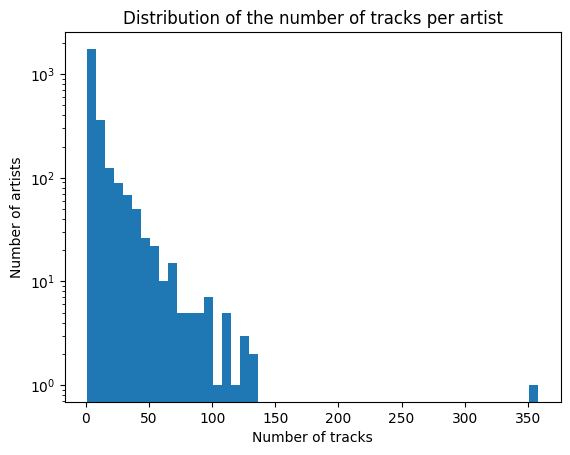

In [8]:
# print the 20 artists with the most tracks
artist_track_count = df_track.groupby('artist_id').size().reset_index(name='track_count')
artist_track_count = artist_track_count.sort_values(by='track_count', ascending=False)

# make a distribution of the number of tracks per artist
plt.hist(artist_track_count['track_count'], bins=50)
plt.xlabel('Number of tracks')
plt.ylabel('Number of artists')
plt.yscale('log')
plt.title('Distribution of the number of tracks per artist')

artist_track_count = artist_track_count.head(20)
artist_track_count['artist_name'] = artist_track_count['artist_id'].apply(convert_artist_id_to_name)
print("Top 20 artists by number of tracks:\n" + str(artist_track_count))

Top 20 albums by number of tracks:
      album_id  track_count                                       album_name
446      448.0          130         Glee: The Music, The Complete Season Two
1504    1506.0          115  Good Vibrations: Thirty Years of The Beach Boys
1520    1522.0          112                              BIRP! February 2012
270      272.0          106        Glee: The Music, The Complete Season Four
1785    1787.0           95                Bleep: The Top 100 Tracks of 2014
175      177.0           87            Musikvideos Jahrescharts 2013 Top 100
1054    1056.0           85                          Disney Classics Box Set
312      314.0           82                                 100x Liefde 2014
599      601.0           62                                    Årsbeste 2009
177      179.0           61                        The Disco Boys, Volume 14
291      293.0           58                          The Video Year Mix 2012
1839    1841.0           54              

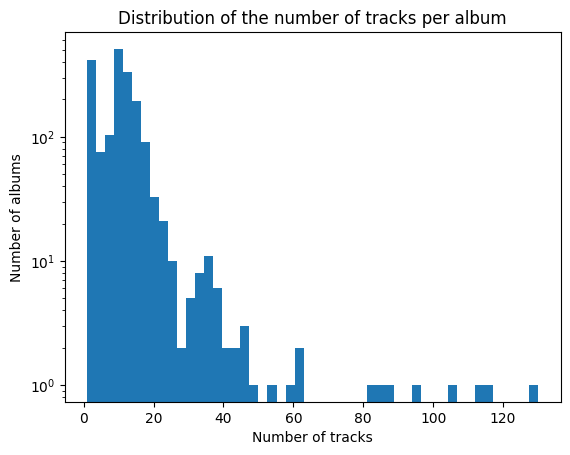

In [9]:
# number of tracks per album
album_track_count = df_track.groupby('album_id').size().reset_index(name='track_count')
album_track_count = album_track_count.sort_values(by='track_count', ascending=False)

# make a distribution of the number of tracks per album
plt.hist(album_track_count['track_count'], bins=50)
plt.xlabel('Number of tracks')
plt.ylabel('Number of albums')
plt.yscale('log')
plt.title('Distribution of the number of tracks per album')

album_track_count = album_track_count.head(20)
album_track_count['album_name'] = album_track_count['album_id'].apply(convert_album_id_to_name)
print("Top 20 albums by number of tracks:\n" + str(album_track_count))


### Similarity

In [10]:
def compare_track_lists_sim(track_id_list_1, track_id_list_2):

    ret_list = []

    for main_track_id in track_id_list_1:
        for other_track_id in track_id_list_2:    
            
            similarity = df_similar[(df_similar['track_id_1'] == main_track_id) & (df_similar['track_id_2'] == other_track_id)]
            
            if not similarity.empty:
                name1 = convert_track_id_to_name(main_track_id)
                name2 = convert_track_id_to_name(other_track_id)
                ret_list.append((name1, name2, float(similarity.iloc[0]["sim_degree"])))

            similarity = df_similar[(df_similar['track_id_2'] == main_track_id) & (df_similar['track_id_1'] == other_track_id)]
            
            if not similarity.empty:
                name1 = convert_track_id_to_name(main_track_id)
                name2 = convert_track_id_to_name(other_track_id)
                ret_list.append((name1, name2, float(similarity.iloc[0]["sim_degree"])))

    ret = sorted(ret_list, key=lambda x: x[2], reverse=True)
    return ret

In [11]:
# Compare all artist_id 1 tracks with all artist_id 2 tracks using track_similarity

artist_1 = 'Justin Bieber'
artist_2 = 'Calvin Harris'

artist_1_tracks_ids = get_all_artist_tracks(artist_1)
artist_2_tracks_ids = get_all_artist_tracks(artist_2)

print(f'Tracks by {artist_1}: {len(artist_1_tracks_ids)}')
print(f'Tracks by {artist_2}: {len(artist_2_tracks_ids)}\n')

# Get the similarity between all tracks by artist 1 and all tracks by the artist 2
result = compare_track_lists_sim(artist_1_tracks_ids, artist_2_tracks_ids) 
for r in result:
    print(r)

if len(result) == 0:
    print('No similarities found between the tracks of the two artists')

Tracks by Justin Bieber: 130
Tracks by Calvin Harris: 109

No similarities found between the tracks of the two artists


In [12]:
# print all track ids that do not have a similarity value
temp_list = []
track_ids = df_track['track_id'].to_list()
for track_id in track_ids:
    if df_similar[(df_similar['track_id_1'] == track_id) | (df_similar['track_id_2'] == track_id)].empty:
        temp_list.append(track_id)

print('Track ids without similarity value:', f"{temp_list[:10]} ..." if len(temp_list) > 10 else temp_list)
print('Number of track ids without similarity value:', len(temp_list))
print('Percentage of track ids without similarity value:', round(len(temp_list) / track_count * 100, 2), '%')

Track ids without similarity value: [1, 12, 14, 16, 19, 23, 31, 32, 33, 35] ...
Number of track ids without similarity value: 16174
Percentage of track ids without similarity value: 69.16 %


In [13]:
# print df_similar
print(df_similar)

        track_id_1  track_id_2  sim_degree
0                2          72    1.000000
1                2          13    0.441825
2                2          69    0.334081
3                2           3    0.332400
4                2          39    0.309246
...            ...         ...         ...
165620        9193         156    0.200924
165621        9193         863    0.177408
165622        9193           3    0.162078
165623        9193           3    0.145992
165624        9193           3    0.135976

[165625 rows x 3 columns]


In [14]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Create a graph
G = nx.Graph()

df_similar_small = df_similar.head(500)

# Add edges with weights
for _, row in df_similar_small.iterrows():
    G.add_edge(row['track_id_1'], row['track_id_2'], weight=row['sim_degree'])

# Set up figure size and resolution BEFORE drawing anything
plt.figure(figsize=(40, 40), dpi=500)

# Layout for the graph
pos = nx.spring_layout(G)

# Find communities
communities = community.greedy_modularity_communities(G)

# Assign colors to each community
node_colors = {}
for idx, comm in enumerate(communities):
    for node in comm:
        node_colors[node] = idx

# Draw nodes with community colors
nx.draw_networkx_nodes(
    G, pos,
    node_size=500,
    node_color=[node_colors[node] for node in G.nodes()]
)

# Draw edges with thickness based on weight
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=G.edges(data=True),
    width=[edge[2]['weight'] * 5 for edge in G.edges(data=True)]  # Scale the thickness
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=5, font_color="black")

# Display the graph
plt.title("Song Similarity Graph")
plt.show()


In [24]:
# create a new dataframe where, instead of df_similar track_id, we have the authors names
df_similar_artists = df_similar.copy()
df_similar_artists['artist_id_1'] = df_similar_artists['track_id_1'].apply(lambda x: df_track[df_track['track_id'] == x]['artist_id'].values[0])
df_similar_artists['artist_id_2'] = df_similar_artists['track_id_2'].apply(lambda x: df_track[df_track['track_id'] == x]['artist_id'].values[0])
df_similar_artists['artist_name_1'] = df_similar_artists['artist_id_1'].apply(lambda x: df_artist[df_artist['artist_id'] == x]['name'].values[0])
df_similar_artists['artist_name_2'] = df_similar_artists['artist_id_2'].apply(lambda x: df_artist[df_artist['artist_id'] == x]['name'].values[0])

# print the new dataframe
print(df_similar_artists)





        track_id_1  track_id_2  sim_degree  artist_id_1  artist_id_2  \
0                2          72    1.000000            2            2   
1                2          13    0.441825            2           11   
2                2          69    0.334081            2           34   
3                2           3    0.332400            2            3   
4                2          39    0.309246            2           34   
...            ...         ...         ...          ...          ...   
165620        9193         156    0.200924         2521          133   
165621        9193         863    0.177408         2521            4   
165622        9193           3    0.162078         2521            3   
165623        9193           3    0.145992         2521            3   
165624        9193           3    0.135976         2521            3   

       artist_name_1  artist_name_2  
0       Taylor Swift   Taylor Swift  
1       Taylor Swift   Selena Gomez  
2       Taylor Swift 

In [26]:
# only keep the sim_degree, artist_name_1 and artist_name_2 columns

df_similar_artists = df_similar_artists[['sim_degree', 'artist_name_1', 'artist_name_2']]

# move sim_degree to the end
df_similar_artists = df_similar_artists[['artist_name_1', 'artist_name_2', 'sim_degree']]

In [27]:
df_similar_artists.head()

artist_name_1  artist_name_2  sim_degree
0  Taylor Swift   Taylor Swift    1.000000
1  Taylor Swift   Selena Gomez    0.441825
2  Taylor Swift  One Direction    0.334081
3  Taylor Swift         Hozier    0.332400
4  Taylor Swift  One Direction    0.309246

In [40]:
# remove df_similar_artists entries where artist_name_1 == artist_name_2
df_similar_artists = df_similar_artists[df_similar_artists['artist_name_1'] != df_similar_artists['artist_name_2']]
df_similar_artists.head()


artist_name_1  artist_name_2  sim_degree
1  Taylor Swift   Selena Gomez    0.441825
2  Taylor Swift  One Direction    0.334081
3  Taylor Swift         Hozier    0.332400
4  Taylor Swift  One Direction    0.309246
5  Taylor Swift         Hozier    0.304773

In [45]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Create a graph
G = nx.Graph()

# Use artist dataframe
df_similar_artists_small = df_similar_artists.head(100)  # Adjust for your actual dataframe

# only keep rows with sim_degree == 1
df_similar_artists_1 = df_similar_artists[df_similar_artists['sim_degree'] == 1]

# Add edges with weights
for _, row in df_similar_artists.iterrows():
    G.add_edge(row['artist_name_1'], row['artist_name_2'], weight=row['sim_degree'])

# Set up figure size and resolution BEFORE drawing anything
plt.figure(figsize=(20, 20), dpi=300)

# Layout for the graph
pos = nx.spring_layout(G, k=0.7, seed=42)  # Adjust k for spacing

# Find communities
communities = community.greedy_modularity_communities(G)

# Assign colors to each community
node_colors = {}
for idx, comm in enumerate(communities):
    for node in comm:
        node_colors[node] = idx

# draw node size based on degree
node_size = [G.degree(node) * 100 for node in G.nodes()]

# Draw nodes with community colors
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_size,
    node_color=[node_colors[node] for node in G.nodes()]
)


# Draw edges with thickness based on weight
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=G.edges(data=True),
    width=[edge[2]['weight'] * 2.5 for edge in G.edges(data=True)]  # Scale the thickness
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_color="gray")

# Display the graph
plt.title("Artist Similarity Graph")
plt.show()


KeyboardInterrupt: 

<Figure size 6000x6000 with 0 Axes>

In [44]:
# make a dataframe of the artist name to number of entries in the df_similar_artists dataframe
artist_count = df_similar_artists['artist_name_1'].value_counts().reset_index()
artist_count.columns = ['artist_name', 'count']
artist_count.head()



artist_name  count
0     Glee Cast   3023
1  Taylor Swift   2254
2         Drake   1485
3    Kanye West   1445
4     Lady Gaga   1399